# 247 FOOD ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
sns.set()
customer_table = pd.read_csv("247foods_customer_table.csv")
order_table = pd.read_csv("247foods_order_table.csv")
logistics_table = pd.read_csv("247foods_logistic_table.csv")


C:\Users\PRECIOUS ONYEDEKE\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Data cleaning for customer table

In [3]:
customer_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10000 non-null  int64 
 1   customer_id      10000 non-null  int64 
 2   first_name       10000 non-null  object
 3   last_name        10000 non-null  object
 4   state            10000 non-null  object
 5   email            10000 non-null  object
 6   rating           10000 non-null  int64 
 7   phone_number     10000 non-null  int64 
 8   amount_bought    10000 non-null  int64 
 9   customer_review  10000 non-null  object
 10  price            10000 non-null  int64 
 11  product_bought   10000 non-null  object
dtypes: int64(6), object(6)
memory usage: 937.6+ KB


the data contained no null value

In [4]:
#renaming amounnt bought to quantity
customer_table = customer_table.rename(columns={'amount_bought': 'Quantity'})
order_table = order_table.rename(columns={'amount_bought': 'Quantity'})


In [5]:
customer_table=customer_table.drop(columns=['id'])
order_table=order_table.drop(columns=['id'])

In [6]:
customer_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      10000 non-null  int64 
 1   first_name       10000 non-null  object
 2   last_name        10000 non-null  object
 3   state            10000 non-null  object
 4   email            10000 non-null  object
 5   rating           10000 non-null  int64 
 6   phone_number     10000 non-null  int64 
 7   Quantity         10000 non-null  int64 
 8   customer_review  10000 non-null  object
 9   price            10000 non-null  int64 
 10  product_bought   10000 non-null  object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [7]:
order_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10000 non-null  float64
 1   customer_id    10000 non-null  float64
 2   product_id     10000 non-null  float64
 3   Quantity       10000 non-null  float64
 4   order_date     10000 non-null  object 
 5   delivery_date  10000 non-null  object 
 6   review         10000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [8]:
order_table['order_date']=pd.to_datetime(order_table['order_date'])
order_table['delivery_date']=pd.to_datetime(order_table['delivery_date'])

In [9]:
order_table['order_id'] = order_table['order_id'].astype(int)
order_table['customer_id'] = order_table['customer_id'].astype(int)
order_table['product_id'] = order_table['product_id'].astype(int)
order_table['Quantity'] = order_table['Quantity'].astype(int)

In [10]:
customer_table = customer_table.drop_duplicates(subset=['customer_id'])

In [11]:
customer_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 6745
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1000 non-null   int64 
 1   first_name       1000 non-null   object
 2   last_name        1000 non-null   object
 3   state            1000 non-null   object
 4   email            1000 non-null   object
 5   rating           1000 non-null   int64 
 6   phone_number     1000 non-null   int64 
 7   Quantity         1000 non-null   int64 
 8   customer_review  1000 non-null   object
 9   price            1000 non-null   int64 
 10  product_bought   1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 93.8+ KB


# Analysis

# Total Revenue

In [69]:
sum(merged_customer_table['Revenue'])

685131500

# Total Orders

In [71]:
merged_customer_table['order_id'].count()

10000

# Total Quantity

In [72]:
sum(merged_customer_table['Quantity_x'])

104266

# Total Product

In [76]:
len(merged_customer_table['product_id'].unique())

236

# Total Customer

In [80]:
len(merged_customer_table['customer_id'].unique())

1000

# Revenue by Years

In [12]:
#create the a column for revenue
customer_table['Revenue'] = customer_table['price'] * customer_table['Quantity']

In [13]:
merged_customer_table = pd.merge(order_table, customer_table, left_on='customer_id', right_on='customer_id', how='left')

In [14]:
merged_customer_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         10000 non-null  int32         
 1   customer_id      10000 non-null  int32         
 2   product_id       10000 non-null  int32         
 3   Quantity_x       10000 non-null  int32         
 4   order_date       10000 non-null  datetime64[ns]
 5   delivery_date    10000 non-null  datetime64[ns]
 6   review           10000 non-null  object        
 7   first_name       10000 non-null  object        
 8   last_name        10000 non-null  object        
 9   state            10000 non-null  object        
 10  email            10000 non-null  object        
 11  rating           10000 non-null  int64         
 12  phone_number     10000 non-null  int64         
 13  Quantity_y       10000 non-null  int64         
 14  customer_review  10000 non-null  object

In [15]:
merged_customer_table['year'] = pd.to_datetime(merged_customer_table['order_date']).dt.year

In [16]:
merged_customer_table['month'] = pd.to_datetime(merged_customer_table['order_date']).dt.month

In [25]:
revenue_by_year = merged_customer_table.groupby(['year'])['Revenue'].sum()
revenue_by_year

year
2020    119884350
2021    147207795
2022    157273152
2023    155630507
2024    105135696
Name: Revenue, dtype: int64

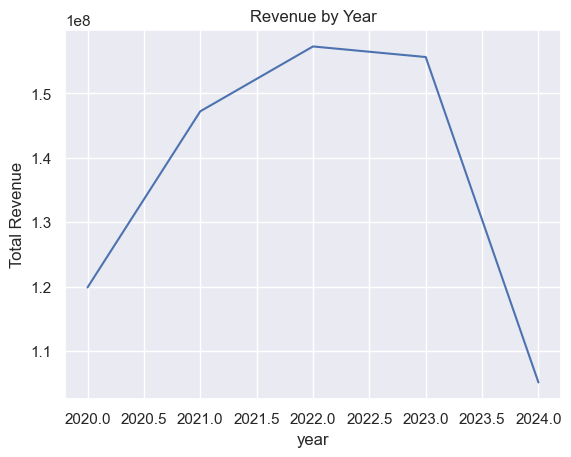

In [18]:
# Plot the revenue trend by year
revenue_by_year.plot(kind='line')
plt.title("Revenue by Year")
plt.ylabel("Total Revenue")
plt.show()

2020: $119,884,350

2021: $147,207,795 (↑ 22.8%)

2022: $157,273,152 (↑ 6.8%)

2023: $155,630,507 (↓ 1.0%)

2024: $105,135,696 (↓ 32.4% - partial year)

 Revenue increased significantly, with a major leap in 2021 (22.8% growth) and steady growth in 2022 (6.8%).In 2023, there's a slight revenue drop of 1%, which suggests potential challenges that might have impacted the business. Revenue for 2024 has dropped by 32.4%. Since 2024 data may only be partial (up to August), this decline could be explained by incomplete data

# Revenue by Month

In [26]:
revenue_by_month = merged_customer_table.groupby(['month'])['Revenue'].sum()
revenue_by_month

month
1     54211291
2     61145529
3     53205423
4     64793112
5     61610846
6     58268598
7     61245509
8     72700326
9     46331507
10    45403639
11    47929113
12    58286607
Name: Revenue, dtype: int64

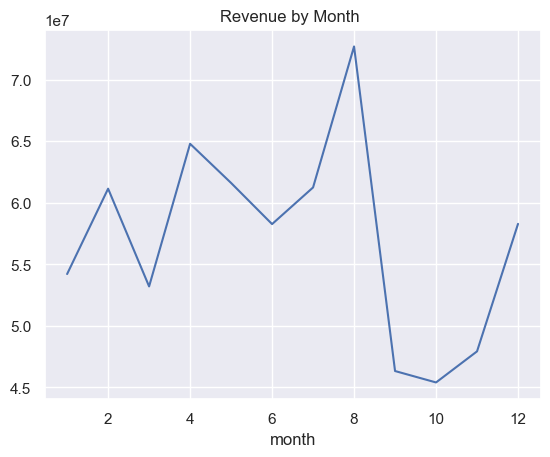

In [23]:
# Plot the price trend by year
revenue_by_month.plot(kind='line')
plt.title("Revenue by Month ")
plt.show()

Highest Revenue Months:

August (Month 8) had the highest revenue at $72.7 million, followed by April ($64.8 million) and May ($61.6 million).

These months generate the highest revenue, indicating potential seasonal peaks or the impact of specific events or promotions.

Lowest Revenue Months:

The lowest revenue occurred in September (Month 9) at $46.3 million and October (Month 10) at $45.4 million. November also had a relatively lower performance at $47.9 million.

Since 2024 data may only be partial (up to August), this decline could be explained by incomplete data

# Highest Number of Product Ordered

In [20]:
most_sold_product=merged_customer_table.groupby(['product_bought'])['order_id'].count()
most_sold_product=most_sold_product.sort_values(ascending=False)
most_sold_product.head(50)


product_bought
Napa Valley Cooking Margarine 250g                                   130
Nestle Milo (400g Sachet)                                            113
2Sure Hand Sanitizer Gel -250ml                                      106
Chivita Active Juice 1ltr - 1pc                                      104
Easy On Spray Starch - 567g (Purple )                                101
COLGATE MAX FRESH SPICY RED 130G                                      88
Rose Belle Serviette 50'S                                             86
Air Wick Freshmatic Max Spray Refill -(Sparkling Citrus) (250ml)      83
Bold Orange Drink X 12                                                83
Cadbury Bournvita (450g Sachet)                                       81
Hollandia Evap Milk 190g- Carton                                      79
Ribena Blackcurrant Or Strawberry- 125ml                              78
Hollandia Evap Full Cream Milk 120g                                   77
Golden Penny Sugar 50kg             

247foods can focus on promoting popular products to further increase sales . 
It can also help optimize Product availability to avoid stockouts.

# Least Number of Product Ordered

In [21]:
most_sold_product.tail(50)

product_bought
Checkers Custard Refill, Vanilla Flavor 1kg                 26
MORTEIN ALL INSECTS KILLER LEMON - 250ML                    26
Green Giant Sweetcorn- About 340g                           26
Delta Delta Medicated Soap 175G                             26
Popcorn Seeds Half Paint                                    25
Rambo Insecticide - 500ml                                   25
Ariel Detergent Ankara Colour - 2kg                         25
NESTLE GOLDEN MORN (600G)                                   25
Dangote Granulated Sugar 250g                               25
Nestle Coffee Mate Origina 400g                             25
COLGATE MAXFRESH COOLMINT 100 ML                            24
HARPIC POWER PLUS ORIGINAL - 450ML                          24
Rose Plus Toilet Tissue                                     24
Hollandia Yoghurt Plain 1Ltr                                24
Rose Belle Toilet Rolls - 2in1 Pack                         24
Dettol Antiseptic Liquid Disinfectant - 

247foods can either discontinue the sales of least performing products, or improve them based on customer feedback to boost their sales. Additionally, understanding why these products are not performing well helps refine product strategy.

# State with More and Least Customers

In [22]:
cust=customer_table.groupby(['state'])['customer_id'].count()
cust=cust.sort_values(ascending=False)
cust

state
Anambra        34
Osun           32
Ogun           32
Rivers         32
Plateau        32
Oyo            32
Nassarawa      29
Taraba         29
Imo            29
Sokoto         29
FCT            29
Ondo           29
Gombe          28
Kaduna         28
Kwara          28
Borno          28
Bayelsa        28
Jigawa         27
Adamawa        27
Akwa Ibom      27
Kebbi          27
Lagos          26
Abia           26
Kano           26
Edo            26
Bauchi         26
Niger          25
Delta          25
Kogi           24
Ekiti          24
Ebonyi         24
Yobe           24
Enugu          23
Cross River    22
Katsina        21
Benue          21
Zamfara        21
Name: customer_id, dtype: int64

By focusing on states with fewer customers, 247foods can create location-based marketing campaigns to increase awareness and penetration. For states with more customers, loyalty programs or personalized marketing can be introduced to retain and grow the customer base.

# Customers with Highest Orders

In [60]:
cust_freq=merged_customer_table.groupby(['customer_id','first_name', 'last_name'])['order_id'].count()
cust_freq=cust_freq.sort_values(ascending=False)
cust_freq#.head(20)

customer_id  first_name   last_name
210          Tunde        Okwuosa      23
898          Jide         Abdullahi    22
848          Haruna       Okoeguale    21
425          Lami         Bello        21
396          Abimbola     Ibrahim      20
                                       ..
467          Nkem         Hassan        3
91           Aminata      Osaigbovo     3
479          Lamide       Abubakar      2
164          Osayemwenre  Onyekwere     2
118          Osarodion    Ogbeide       1
Name: order_id, Length: 1000, dtype: int64

247foods can implement offer personalized discounts, or introduce exclusive products to high-order customers, encouraging repeat purchases and turning them into brand advocates. Additionally, these customers can provide valuable feedback to improve products and services.

# Delivery Rate

In [25]:
merged_customer_table['delivary_rate']=merged_customer_table['delivery_date']-merged_customer_table['order_date']

In [26]:
merged_customer_table['delivary_rate'] =merged_customer_table['delivary_rate'].astype(str)

In [61]:
delivary_rate=merged_customer_table.groupby(['delivary_rate'])['delivary_rate'].count()
delivary_rate=delivary_rate.sort_values(ascending=False)
delivary_rate

delivary_rate
6 days     1347
9 days     1287
4 days     1269
8 days     1268
5 days     1260
7 days     1222
10 days    1186
3 days     1161
Name: delivary_rate, dtype: int64

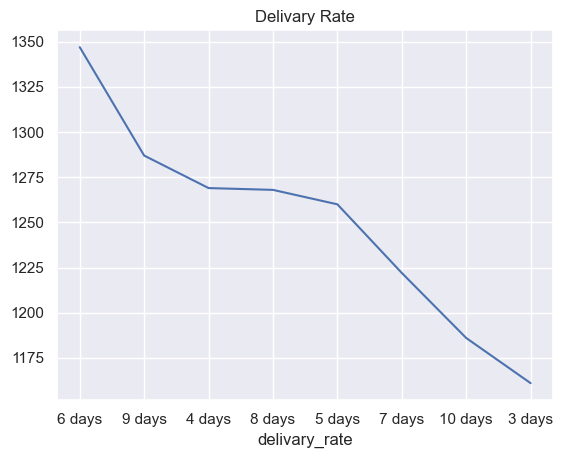

In [28]:
# Plot the delivary 
delivary_rate.plot(kind='line')
plt.title("Delivary Rate")
plt.show()

The delivery rates generally range from 3 to 10 days

Faster Deliveries (3–4 days): Only about 2,430 deliveries occur in 3–4 days, which indicate that there should be an improvement in customer satisfaction on deliveries.

Slow Deliveries (9–10 days): A significant number of orders (around 2,473) are taking 9-10 days for delivery, which could indicate a potential delay issue and inefficiencies in logistics.

-->This could involve reviewing the regional logistics company  or analyzing peak demand periods when deliveries might slow down. Improving the logistics in these areas will enhance the overall customer experience and drive growth through improved service.

-->If certain areas or products have consistently longer delivery times (e.g., 9-10 days), make sure customers are aware beforehand. Offering delivery tracking can further enhance the customer experience and reduce delivery complaints.


# Customer Reviews

In [30]:
len(customer_table['customer_id'].unique())

1000

In [31]:
rating=customer_table.groupby(['customer_id', 'customer_review','product_bought'])['rating'].sum()
rating=rating.sort_values(ascending=False)
rating

customer_id  customer_review           product_bought                                      
453          Good product              Peak Evaporated Milk (160G TIN) - Carton Price X 24     5
515          I got what i ordered for  COCA COLA PET 1Ltr X 6pcs                               5
343          Good product              Baker'S Choice Icing Sugar 1kg                          5
172          Good product              MORTEIN ALL INSECTS KILLER LEMON - 250ML                5
173          I got what i ordered for  Fresh Yo Milk Drink 125ml X 16                          5
                                                                                              ..
820          Scammers                  Kelloggs Frosties 1kg (1 Box)                           1
354          Bad product               Famous Amos Chocolate Chips 56g X42 (Carton)            1
353          I am not coming back      Ok Sweets Banana And Cream (52 Pieces)                  1
825          Scammers              

In [32]:
good=customer_table.loc[customer_table['rating']>=4]

In [33]:
len(good)

393

In [34]:
bad=customer_table.loc[customer_table['rating']<=3]

In [35]:
len(bad)

607

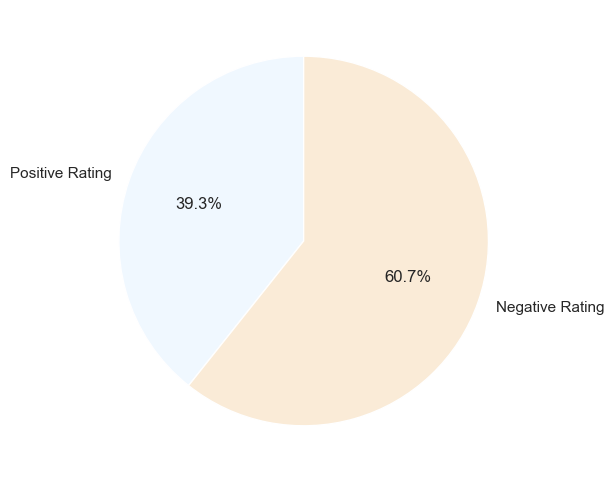

In [36]:
labels = ['Positive Rating', 'Negative Rating']
sizes = [393, 607]
colors = ['Blue', 'maroon']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=mcolors.CSS4_COLORS)
plt.show()

--> Majority Negative Feedback: A significant portion of the customer reviews (60.7%) are negative, which is a concern for customer satisfaction and customer's long-term loyalty.

-->Low Positive Rating: With only 39.3% of reviews being positive, this means there is need for improvement in customer experience, product quality, or service delivery, this areas need to.

# Delivery Reviews

In [39]:
logistics_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   agent_id        1000 non-null   float64
 1   delivery_agent  1000 non-null   object 
 2   product_id      1000 non-null   float64
 3   order_date      1000 non-null   object 
 4   delivery_date   1000 non-null   object 
 5   review          1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [40]:
logistics_table['review'].unique()

array(['Good', 'Poor delivery service', 'Slow delivery agent',
       'Swift delivery', 'Bad', 'Fast delivery'], dtype=object)

In [68]:
logistics_rating=logistics_table.groupby(['delivery_agent','review'])['review'].count()
logistics_rating=logistics_rating.sort_values(ascending=False)
logistics_rating.head(40)

delivery_agent  review               
Temidayo        Bad                      30
David           Poor delivery service    29
Hamza           Slow delivery agent      28
David           Slow delivery agent      28
Akim            Poor delivery service    28
Chidi           Poor delivery service    27
Okafor          Poor delivery service    27
Michael         Poor delivery service    27
Hamza           Poor delivery service    27
Michael         Slow delivery agent      26
David           Bad                      25
Daniel          Poor delivery service    25
Dare            Poor delivery service    25
                Bad                      24
Shanu           Bad                      24
                Slow delivery agent      24
Ali             Slow delivery agent      23
Daniel          Bad                      23
Ali             Bad                      22
Michael         Bad                      22
Ali             Poor delivery service    22
Okafor          Slow delivery agent   

-->Mixed Feedback: The equal split between positive and negative delivery reviews suggests that customers are having inconsistent experiences with the delivery service.

-->Potential for Improvement: While 50% of the customers are satisfied with the delivery, the other 50% have negative experiences, which presents an opportunity to enhance delivery reliability and speed.
    
--> Examine the specific complaints from the negative reviews. Are they related to delivery delays, damaged products, lack of communication, or issues with logistics? 

-->Identifying common themes will help pinpoint where improvements are needed 

1. working with better delivery agent

2. improving packaging

3. providing on time product deliveries.